<a href="https://colab.research.google.com/github/Wjnnje/DDN/blob/main/Forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fires Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.impute import MissingIndicator
from sklearn.pipeline import make_union

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires (3).csv


In [20]:
df=pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Our Data :

    X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
    Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
    month - month of the year: "jan" to "dec"
    day - day of the week: "mon" to "sun"
    FFMC - FFMC index from the FWI system: 18.7 to 96.20
    DMC - DMC index from the FWI system: 1.1 to 291.3
    DC - DC index from the FWI system: 7.9 to 860.6
    ISI - ISI index from the FWI system: 0.0 to 56.10
    temp - temperature in Celsius degrees: 2.2 to 33.30
    RH - relative humidity in %: 15.0 to 100
    wind - wind speed in km/h: 0.40 to 9.40
    rain - outside rain in mm/m2 : 0.0 to 6.4
    area - the burned area of the forest (in ha): 0.00 to 1090.84
    (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

    FFMC, DMC, DC, ISI and RH belonged in the study this data was pulled from but they are useless to us now. We will therefore be dropping them.

In [21]:
df.drop(["FFMC", "DMC", "DC", "ISI", "RH"], axis=1, inplace=True)
df.head()

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,0.0
1,7,4,oct,tue,18.0,0.9,0.0,0.0
2,7,4,oct,sat,14.6,1.3,0.0,0.0
3,8,6,mar,fri,8.3,4.0,0.2,0.0
4,8,6,mar,sun,11.4,1.8,0.0,0.0


## Data Inspection

In [22]:
df.shape

(517, 8)

In [23]:
df.isna().sum()

X        0
Y        0
month    0
day      0
temp     0
wind     0
rain     0
area     0
dtype: int64

In [24]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
temp     0
wind     0
rain     0
area     0
dtype: int64

In [25]:
df.dtypes

X          int64
Y          int64
month     object
day       object
temp     float64
wind     float64
rain     float64
area     float64
dtype: object

## Dataviz

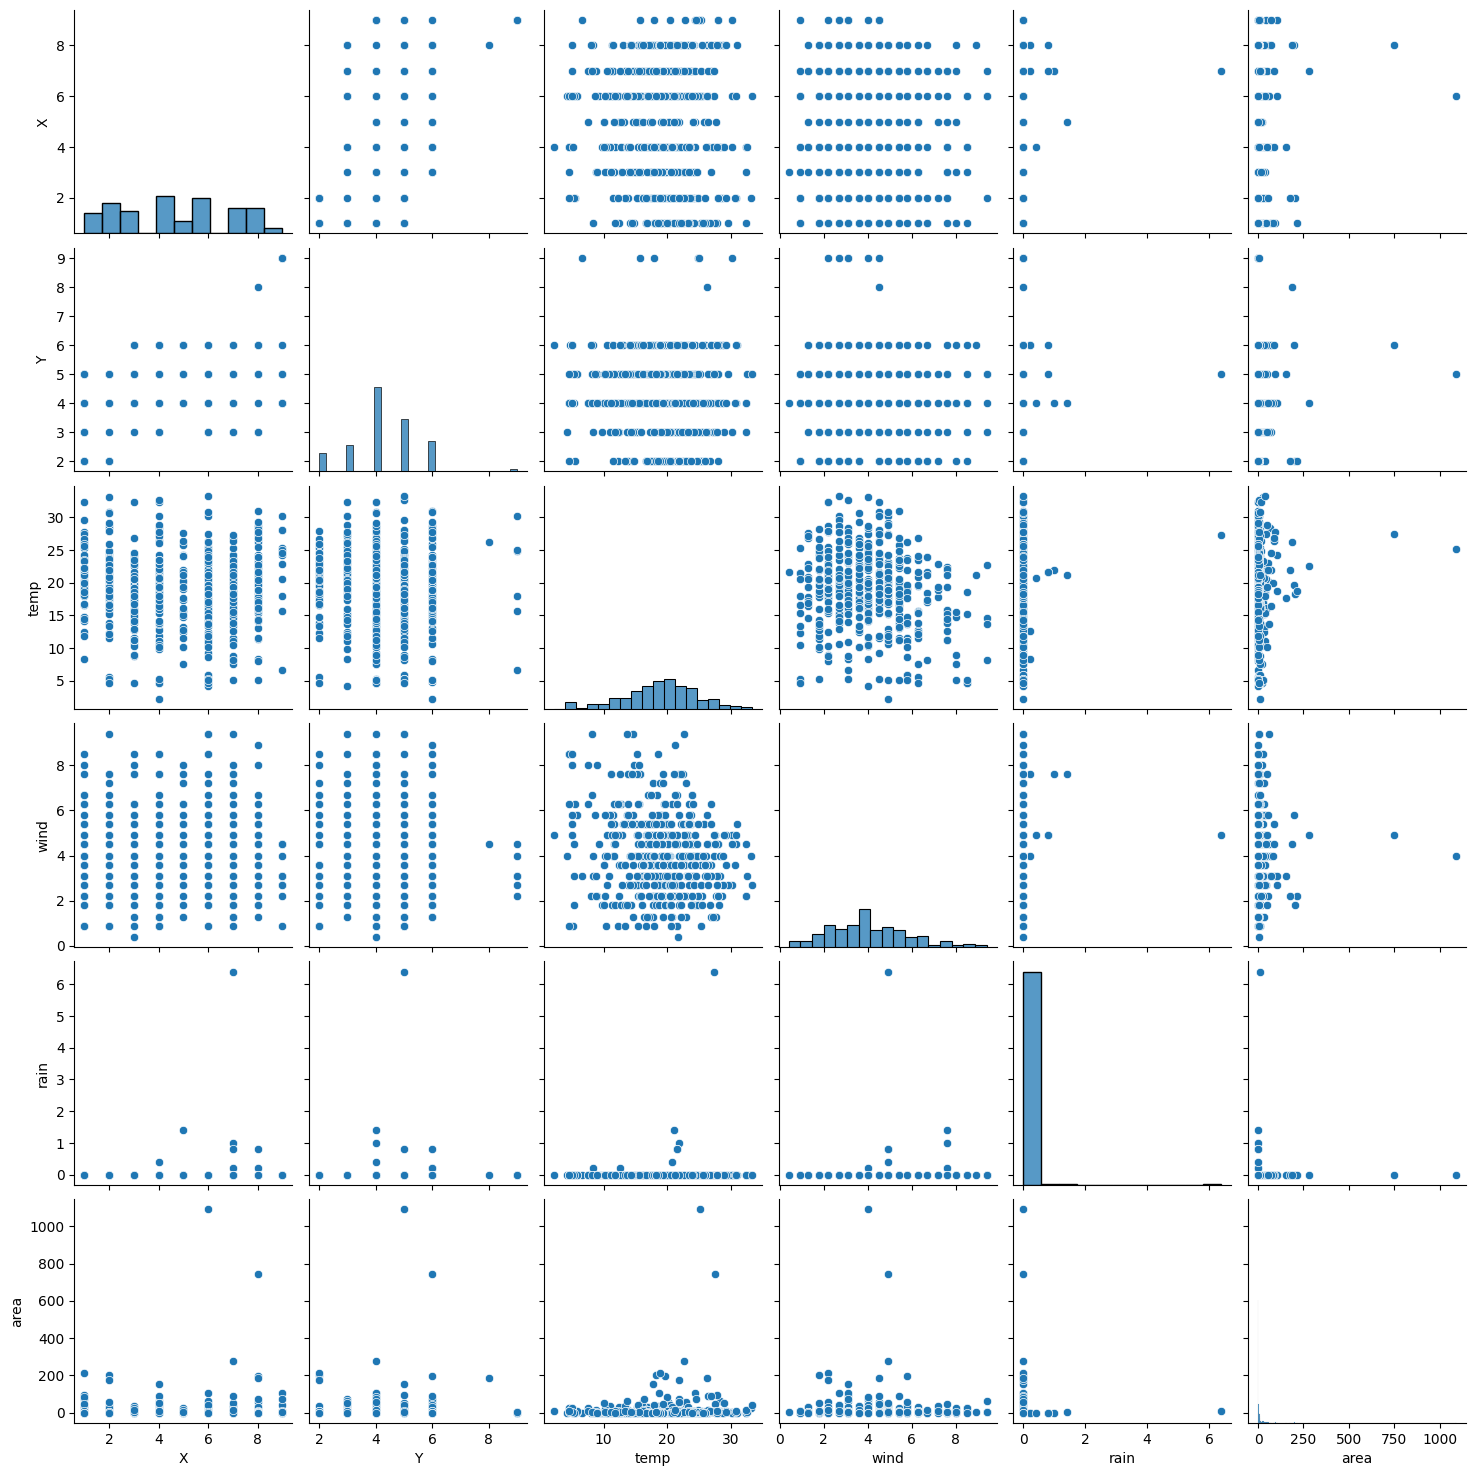

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Pairplot for numerical columns
sns.pairplot(df[['X', 'Y', 'temp', 'wind', 'rain', 'area']])
plt.show()

<ipython-input-28-471929b2c18d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


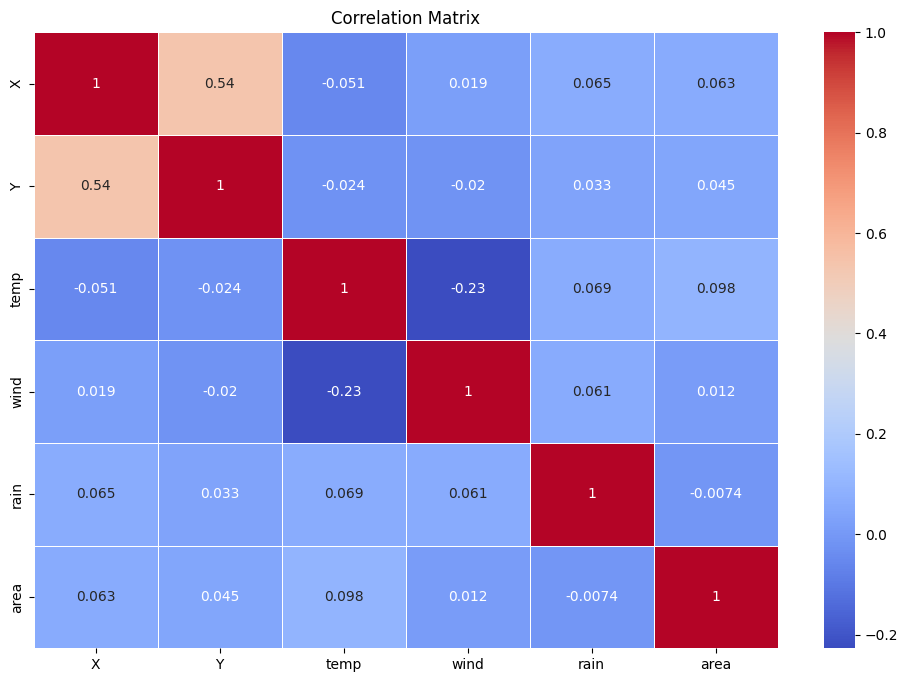

In [28]:
# Heatmap for correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


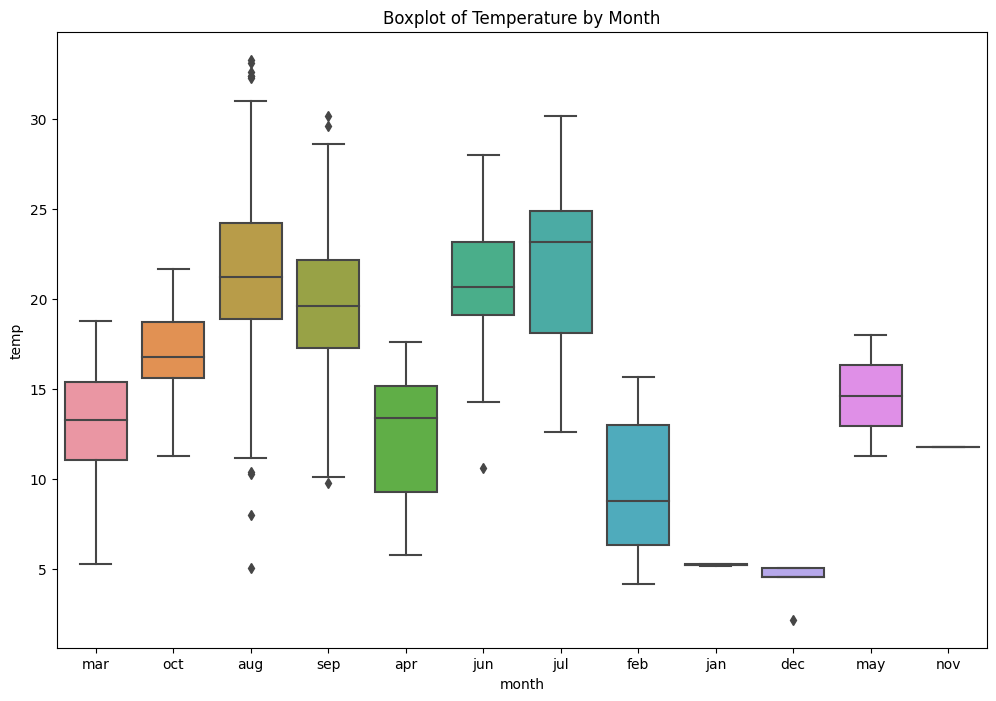

In [29]:
# Boxplot for categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='month', y='temp', data=df)
plt.title('Boxplot of Temperature by Month')
plt.show()

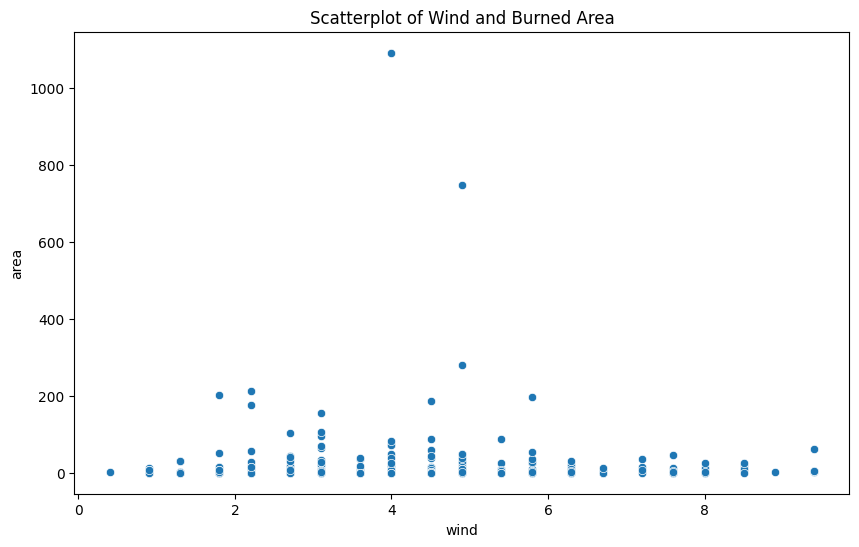

In [30]:
# Scatterplot for two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind', y='area', data=df)
plt.title('Scatterplot of Wind and Burned Area')
plt.show()

## App

In [ ]:
# app.py

import streamlit as st

def main():
    st.title("File Upload Streamlit App")

    # File uploader
    uploaded_file = st.file_uploader("Choose a file", type=["csv", "txt", "xlsx"])

    if uploaded_file is not None:
        # Display file details
        st.write("File Details:")
        st.write(f"Name: {uploaded_file.name}")
        st.write(f"Type: {uploaded_file.type}")
        st.write(f"Size: {uploaded_file.size} bytes")

        # Display file contents
        st.write("File Content:")
        data = uploaded_file.read()
        st.code(data)

if __name__ == "__main__":
    main()
